<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imporitng-Required-Packages" data-toc-modified-id="Imporitng-Required-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imporitng Required Packages</a></span></li><li><span><a href="#Importing-Dataset" data-toc-modified-id="Importing-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Dataset</a></span></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Train Test Split</a></span></li><li><span><a href="#ARMA-Model" data-toc-modified-id="ARMA-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ARMA Model</a></span><ul class="toc-item"><li><span><a href="#Estimating-Lags" data-toc-modified-id="Estimating-Lags-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Estimating Lags</a></span></li></ul></li><li><span><a href="#Modeling-ARMA(1,-1)-Residuals" data-toc-modified-id="Modeling-ARMA(1,-1)-Residuals-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modeling ARMA(1, 1) Residuals</a></span><ul class="toc-item"><li><span><a href="#GARCH-Model" data-toc-modified-id="GARCH-Model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>GARCH Model</a></span><ul class="toc-item"><li><span><a href="#Estimating-Lags" data-toc-modified-id="Estimating-Lags-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Estimating Lags</a></span></li><li><span><a href="#GARCH(2,-2)-Model" data-toc-modified-id="GARCH(2,-2)-Model-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>GARCH(2, 2) Model</a></span></li></ul></li></ul></li><li><span><a href="#ARMA(1,-1)-(Predictions)---GARCH(2,-2)-(Confidence-Levels)-Model" data-toc-modified-id="ARMA(1,-1)-(Predictions)---GARCH(2,-2)-(Confidence-Levels)-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ARMA(1, 1) (Predictions) - GARCH(2, 2) (Confidence Levels) Model</a></span></li></ul></div>

# Imporitng Required Packages

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

from arch import arch_model

from sklearn.metrics import mean_squared_error

import warnings

sns.set()
warnings.filterwarnings("ignore")

# Importing Dataset

In [62]:
data_backup = pd.read_csv('/windows/proga/data.csv')
data_backup.Date = pd.to_datetime(data_backup.Date)
data_backup.set_index("Date", inplace = True)

In [63]:
data = data_backup[["spx_ret"]]

In [64]:
data

,spx_ret
Date,
1994-01-06,NaN
1994-01-07,0.595136
1994-01-10,1.142795
1994-01-11,-0.239860
1994-01-12,0.008438
...,...
2019-08-26,1.098299
2019-08-27,-0.320318
2019-08-28,0.654548


# Train Test Split

In [48]:
train_df = data.loc[:"2018-12-31"]
test_df = data.loc["2019-01-01":]

# ARMA Model

## Estimating Lags

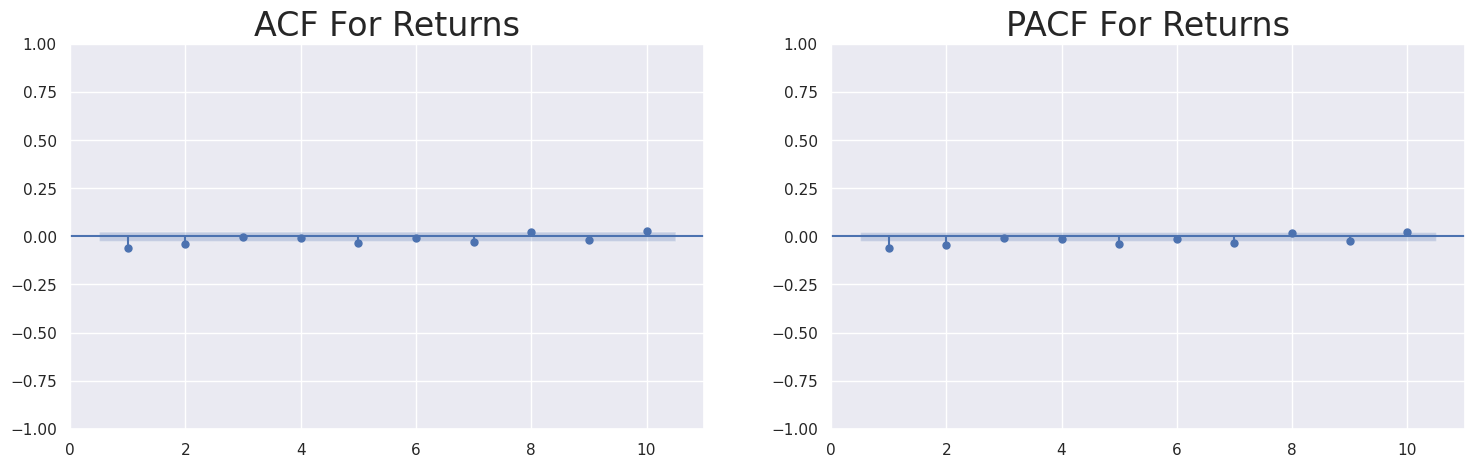

In [49]:
plt.rcParams["figure.figsize"] = 18, 5

fig, axes = plt.subplots(1, 2)

sgt.plot_acf(train_df.spx_ret[1:], zero = False, lags = 10, ax = axes[0])
sgt.plot_pacf(train_df.spx_ret[1:], zero = False, lags = 10, ax = axes[1])

axes[0].set_title("ACF For Returns", size = 24)
axes[1].set_title("PACF For Returns", size = 24)

plt.show()

**Building the Model**

In [50]:
model = ARIMA(train_df["spx_ret"][1:], order =(1,0,1))
model_results = model.fit()
print(model_results.summary())

                               SARIMAX Results                                
Dep. Variable:                spx_ret   No. Observations:                 6517
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -10021.027
Date:                Tue, 22 Aug 2023   AIC                          20050.054
Time:                        14:47:28   BIC                          20077.182
Sample:                    01-07-1994   HQIC                         20059.435
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0321      0.013      2.555      0.011       0.007       0.057
ar.L1          0.6653      0.044     15.058      0.000       0.579       0.752
ma.L1         -0.7271      0.040    -18.223      0.0

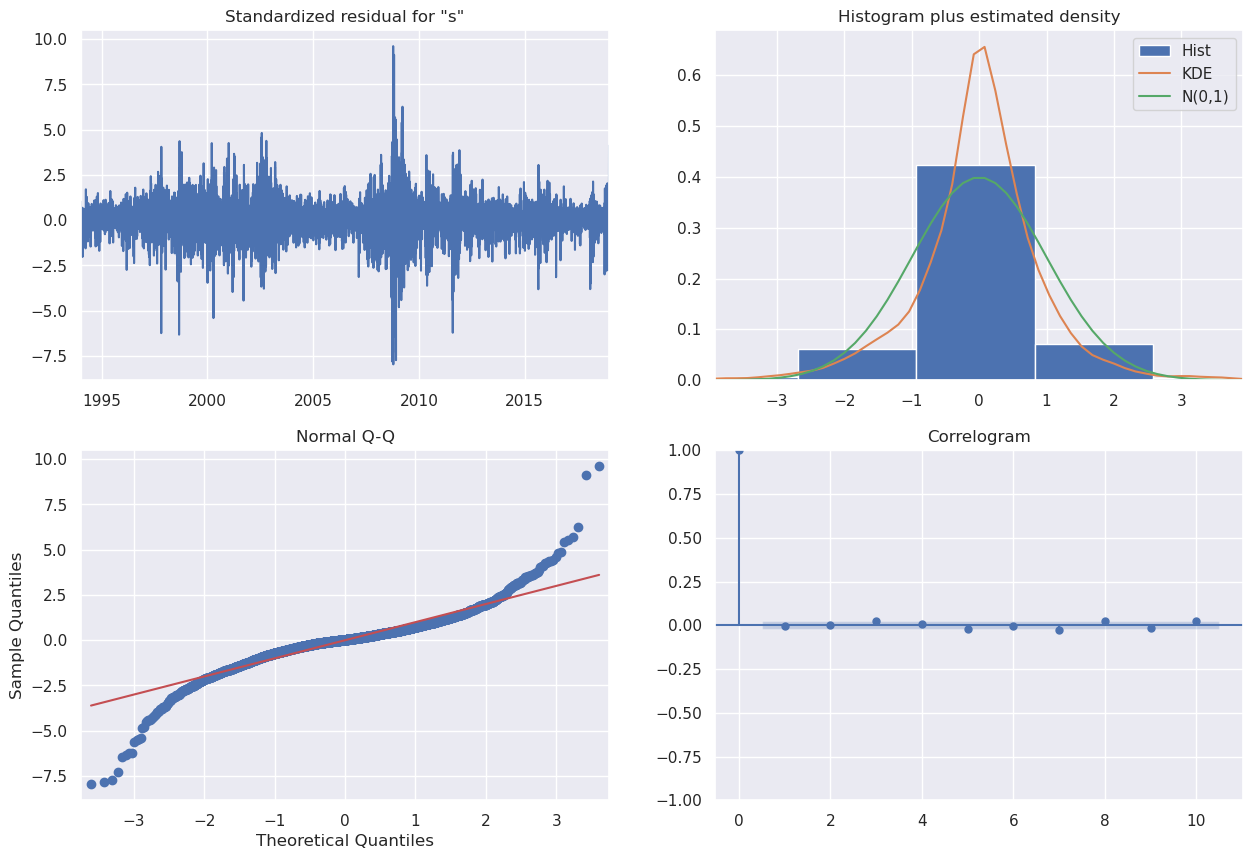

In [51]:
model_results.plot_diagnostics(figsize=(15, 10))
plt.show()

**Predictions**

In [52]:
arma_forecast = model_results.get_forecast(len(test_df.index))
arma_predictions_df = arma_forecast.conf_int(alpha = 0.05) # Confidence level of 95%
arma_predictions_df["Predictions"] = model_results.predict(start = test_df.index[0], end = test_df.index[-1])

In [9]:
arma_predictions_df

,lower spx_ret,upper spx_ret,Predictions
2019-01-01,-2.280245,2.133856,-0.073194
2019-01-02,-2.249213,2.173302,-0.037955
2019-01-03,-2.227628,2.198605,-0.014512
2019-01-04,-2.212854,2.215024,0.001085
2019-01-07,-2.202842,2.225764,0.011461
...,...,...,...
2019-08-26,-2.182508,2.246676,0.032084
2019-08-27,-2.182508,2.246676,0.032084
2019-08-28,-2.182508,2.246676,0.032084
2019-08-29,-2.182508,2.246676,0.032084


**Plot of Predicted vs Actual Values**

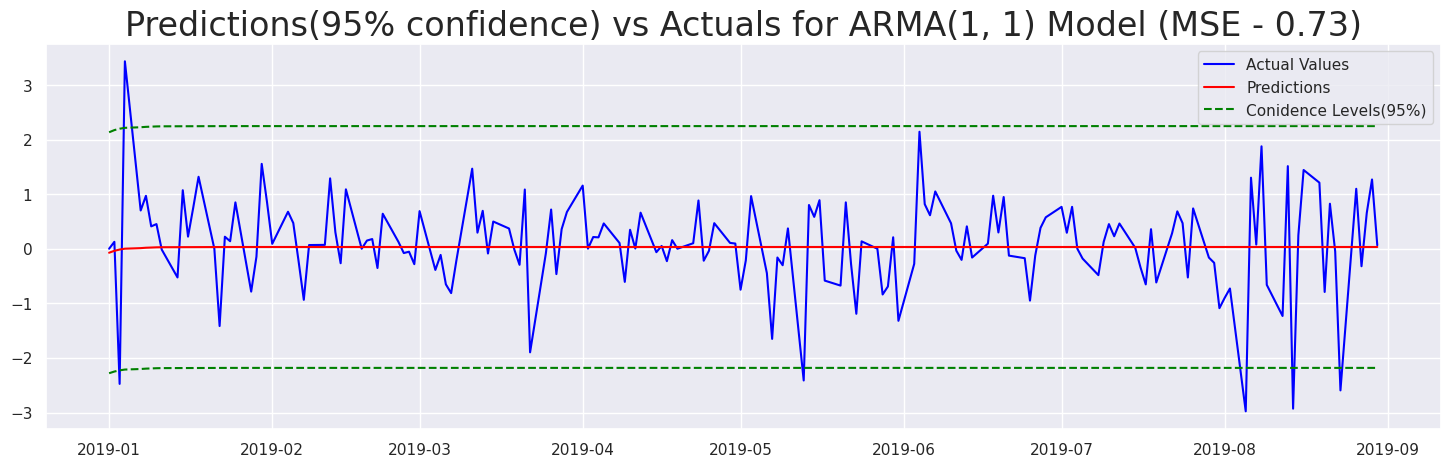

In [53]:
arma_mse = mean_squared_error(test_df["spx_ret"].values, arma_predictions_df["Predictions"])

plt.rcParams["figure.figsize"] = 18, 5

plt.plot(test_df["spx_ret"], color = "blue", label = "Actual Values")

plt.plot(arma_predictions_df["Predictions"], color = "red", label = "Predictions")
plt.plot(arma_predictions_df["upper spx_ret"], color = "green", linestyle = "--", label = "Conidence Levels(95%)")
plt.plot(arma_predictions_df["lower spx_ret"], color = "green", linestyle = "--")

plt.title(f"Predictions(95% confidence) vs Actuals for ARMA(1, 1) Model (MSE - {round(arma_mse, 2)})", size = 24)

plt.legend()
plt.show()

# Modeling ARMA(1, 1) Residuals

Plotting **Residuals** of **ARMA(1, 1)** Model

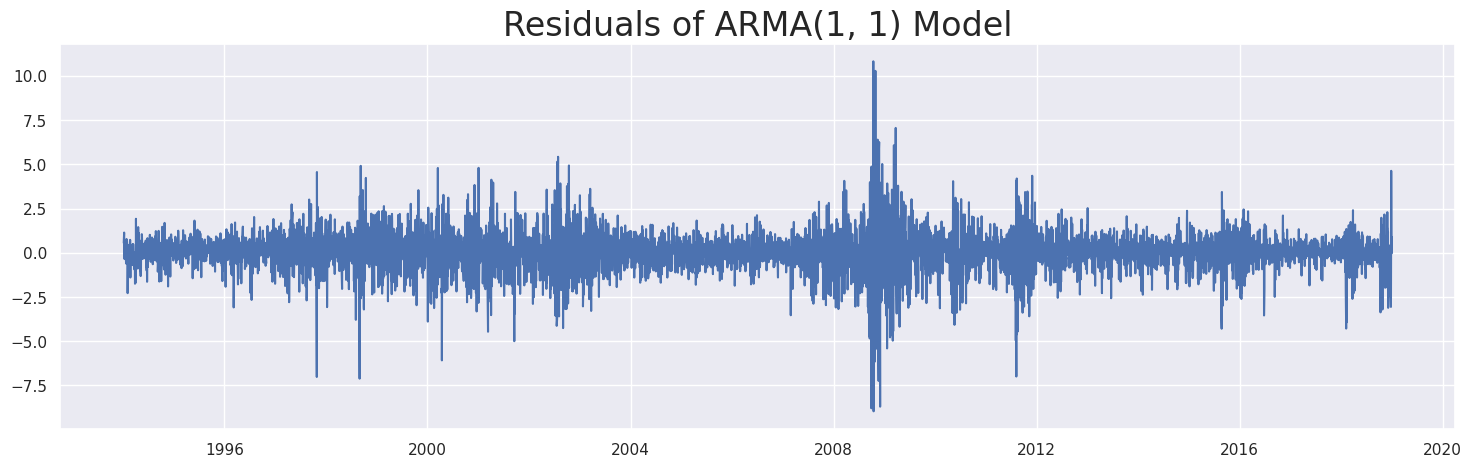

In [54]:
plt.rcParams["figure.figsize"] = 18, 5

plt.plot(model_results.resid)
plt.title("Residuals of ARMA(1, 1) Model", size = 24)

plt.show()

Through this plot, it is obvious that the variance varies with time and hence modeling this with a **GARCH** model may be reasonable. 

## GARCH Model

### Estimating Lags

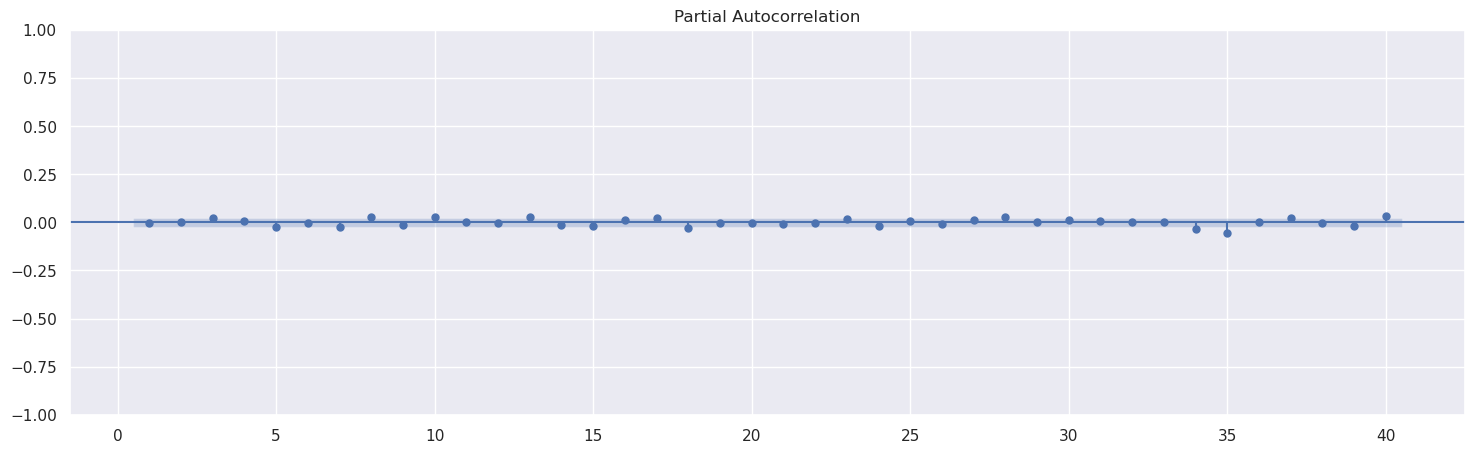

In [55]:
plt.rcParams["figure.figsize"] = 18, 5

sgt.plot_pacf(model_results.resid[1:], zero = False, lags = 40)

plt.show()

### GARCH(2, 2) Model

**Preparing Data**

In [56]:
resid_df = data.copy()
resid_df["spx_ret_resid"] = resid_df["spx_ret"].shift(1).loc[resid_df.index]
resid_df.loc[train_df.index[1]:train_df.index[-1], "spx_ret_resid"] = model_results.resid

**Building the Model**

**Note**: In some cases, the model may fail to converge. In such case, running the code cell below will most likely fix the issue. However, one can also follow the approach given [here](https://quant.stackexchange.com/questions/32350/fitting-garch1-1-in-python-for-moderately-large-data-sets) for a more robust solution.

In [58]:
resid_model = arch_model(resid_df["spx_ret_resid"][1:], p = 2, q = 2, vol = "GARCH")
resid_model_results = resid_model.fit(last_obs = test_df.index[0], update_freq = 5)
resid_model_results.summary()

Iteration:      5,   Func. Count:     49,   Neg. LLF: 2851096479.1573963
Iteration:     10,   Func. Count:     91,   Neg. LLF: 8620.96660774338
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8620.841150168979
            Iterations: 14
            Function evaluations: 119
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:          spx_ret_resid   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8620.84
Distribution:                  Normal   AIC:                           17253.7
Method:            Maximum Likelihood   BIC:                           17294.4
                                        No. Observations:                 6517
Date:                Tue, Aug 22 2023   Df Residuals:                     6516
Time:                        14:48:02   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0379  9.950e-03      3.813  1.373e-04 [1.844e-02,5.744e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0256  6.718e-03      3.805  1.421e-04 [1.239e-02,3.872e-02]
alpha[1]       0.0587  1.610e-02      3.644  2.689e-04 [2.710e-02,9.020e-02]
alpha[2]       0.0988  2.146e-02      4.603  4.156e-06   [5.672e-02,  0.141]
beta[1]        0.3038      0.139      2.184  2.899e-02   [3.112e-02,  0.576]
beta[2]        0.5186      0.128      4.040  5.350e-05     [  0.267,  0.770]
============================================================================

Covariance estimator: robust
"""

**Predictions**

In [59]:
resid_forecasts = resid_model_results.forecast().residual_variance.loc[test_df.index].values

# ARMA(1, 1) (Predictions) - GARCH(2, 2) (Confidence Levels) Model

In [60]:
arma_garch_predictions_df = arma_predictions_df.copy()
arma_garch_predictions_df["lower spx_ret"] = arma_garch_predictions_df["Predictions"] - resid_forecasts.reshape(-1,)
arma_garch_predictions_df["upper spx_ret"] = arma_garch_predictions_df["Predictions"] + resid_forecasts.reshape(-1,)

In [43]:
arma_garch_predictions_df.head(10)

,lower spx_ret,upper spx_ret,Predictions
2019-01-01,-1.160628,1.054821,-0.052903
2019-01-02,-0.910517,0.877084,-0.016716
2019-01-03,-0.900783,0.893132,-0.003826
2019-01-04,-2.851064,2.862777,0.005856
2019-01-07,-4.534285,4.560135,0.012925
2019-01-08,-1.019653,1.055832,0.018089
2019-01-09,-1.152807,1.196532,0.021863
2019-01-10,-0.915818,0.965057,0.024619
2019-01-11,-0.924557,0.977824,0.026633
2019-01-14,-0.865982,0.922192,0.028105


**Plotting the Final Predictions + Confidence Intervals**

[]

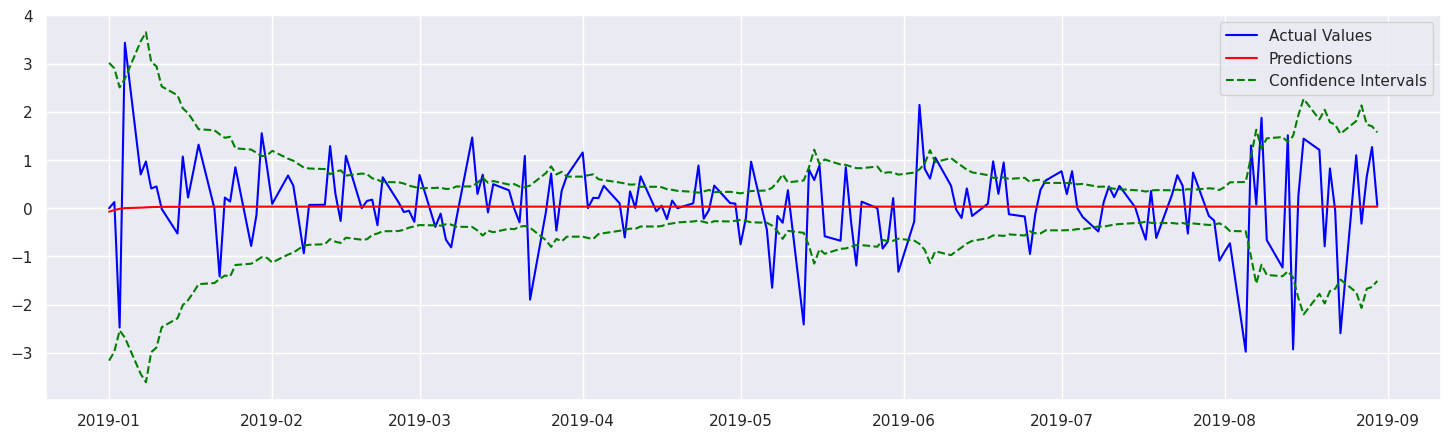

In [61]:
plt.rcParams["figure.figsize"] = 18, 5

plt.plot(test_df["spx_ret"], color = "blue", label = "Actual Values")

plt.plot(arma_garch_predictions_df["Predictions"][test_df.index], color = "red", label = "Predictions")
plt.plot(arma_garch_predictions_df["lower spx_ret"][test_df.index], color = "green", linestyle = "--", label = "Confidence Intervals")
plt.plot(arma_garch_predictions_df["upper spx_ret"][test_df.index], color = "green", linestyle = "--")

plt.legend()
plt.plot()